# 砂防学・ゼミ
## WORKING WITH TIME SERIES LIKE RAINFALL DATA SEMINAR 1

When working in the field of SABO, you will often encounter data that are formatted in tables in different ways, and in tables that are often much larger than the ones that Excel and most point-and-click software can handle. It thus becomes handy to use Python and libraries such as PANDAS to handle the dataset.

砂防学の分野で働く際には、さまざまな形式のテーブルでフォーマットされたデータによく出くわすことがあります。これらのテーブルは、Excelやほとんどのポイントアンドクリックソフトウェアで処理できるものよりもはるかに大きいことが多いです。そのため、PythonやPANDASなどのライブラリを使用してデータセットを処理すると便利です。

## 1. Reading and extracting data from a csv file in a dataframe

In [76]:
%matplotlib inline   # Remember to use this to display graphics on a python Jupyter page

# import the necessary library
import pandas as pd
import matplotlib.pyplot as plt

# import the data used in the present case (the data will be stored with this file)
df = pd.read_csv('Himeji_Rainfall1993,6,1-2023,5,31.csv', encoding="cp932", engine ='python')

In [77]:
# Just to make sure that you've got everything in place, let's have a peep at the first few rows.
df.head()

,年月日,1時間降水量の最大(mm),1時間降水量の最大(mm).1,1時間降水量の最大(mm).2,1時間降水量の最大(mm).3
0,1993/6/1,0.0,1.0,8,1
1,1993/6/2,10.0,0.0,8,1
2,1993/6/3,1.5,0.0,8,1
3,1993/6/4,0.0,1.0,8,1
4,1993/6/5,0.0,1.0,8,1


In [78]:
# pandas will usually read columns by name, but you can also locate them by column numbers:

df.iloc[:, [1]]

,1時間降水量の最大(mm)
0,0.0
1,10.0
2,1.5
3,0.0
4,0.0
...,...
10952,0.0
10953,0.0
10954,8.0
10955,5.0


In [79]:
# Although we have used a font that reads Japanese language, it is more convinient to compute in one single alphabetic language
# ... so here we go, let's do some renaming and also reformatting.

df.rename(columns={'1時間降水量の最大(mm)':'MaxRain1hour'}, inplace=True)
df['年月日'] = pd.to_datetime(df['年月日'])
df = df.rename(columns={'年月日': 'Date'})
df.set_index('Date', inplace=True)

In [80]:
# Once again, let's check:
df.head()

,MaxRain1hour,1時間降水量の最大(mm).1,1時間降水量の最大(mm).2,1時間降水量の最大(mm).3
Date,,,,
1993-06-01,0.0,1.0,8,1
1993-06-02,10.0,0.0,8,1
1993-06-03,1.5,0.0,8,1
1993-06-04,0.0,1.0,8,1
1993-06-05,0.0,1.0,8,1


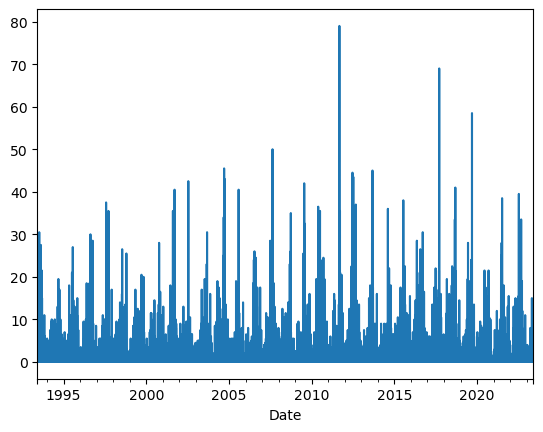

In [99]:
df["MaxRain1hour"].plot()
plt.show()

In [94]:
top_10_max = df.nlargest(10, 'MaxRain1hour')
print(top_10_max)

            MaxRain1hour  1時間降水量の最大(mm).1  1時間降水量の最大(mm).2  1時間降水量の最大(mm).3
Date                                                                       
2011-09-04          79.0              0.0                8                1
2011-09-03          78.0              0.0                8                1
2017-09-17          69.0              0.0                8                1
2019-09-11          58.5              0.0                8                1
2007-08-19          50.0              0.0                8                1
2004-09-14          45.5              0.0                8                1
2013-09-04          45.0              0.0                8                1
2012-06-19          44.5              0.0                8                1
2012-07-07          43.5              0.0                8                1
2004-09-29          43.0              0.0                8                1


#### Finding and displaying the top 10 maximum values in a dataframe

Very often, you will need to find the maximum rainfall values over a period, to either define flood disaster risk, mass movement triggering...etc.

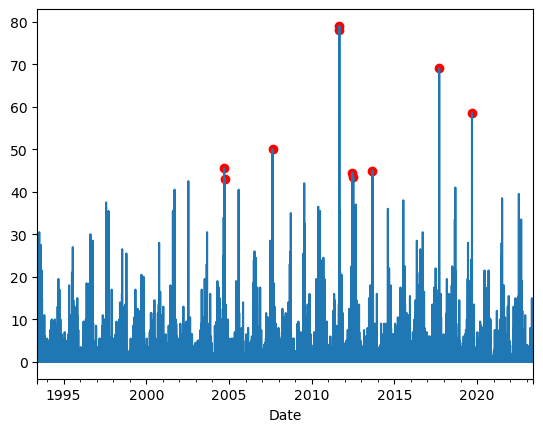

In [100]:
df["MaxRain1hour"].plot()
plt.scatter(top_10_max.index, top_10_max["MaxRain1hour"], color="red")
plt.show()

## 2. Extracting descriptive statistics

#### Return-periods graphic

When dealing with natural hazards and rainfall, we often hear once in a ten year, which does not mean that in 10 years it happens once, it means that statistically it is the value that appears exactly or less than 1 time every 10 years, but this value can occurr several years in a row, even if it is once in a 10 years flow/flood...

What we need to do is to sort our values from the largest to the smallest and then re-index them as follows:

In [114]:
sorted_df = df.sort_values('MaxRain1hour', ascending=False)

In [115]:
sorted_df.head()

,MaxRain1hour,1時間降水量の最大(mm).1,1時間降水量の最大(mm).2,1時間降水量の最大(mm).3
Date,,,,
2011-09-04,79.0,0.0,8,1
2011-09-03,78.0,0.0,8,1
2017-09-17,69.0,0.0,8,1
2019-09-11,58.5,0.0,8,1
2007-08-19,50.0,0.0,8,1


In [116]:
sorted_df['Date'] = sorted_df.index
sorted_df.index = range(len(sorted_df))
sorted_df.head()

,MaxRain1hour,1時間降水量の最大(mm).1,1時間降水量の最大(mm).2,1時間降水量の最大(mm).3,Date
0,79.0,0.0,8,1,2011-09-04
1,78.0,0.0,8,1,2011-09-03
2,69.0,0.0,8,1,2017-09-17
3,58.5,0.0,8,1,2019-09-11
4,50.0,0.0,8,1,2007-08-19


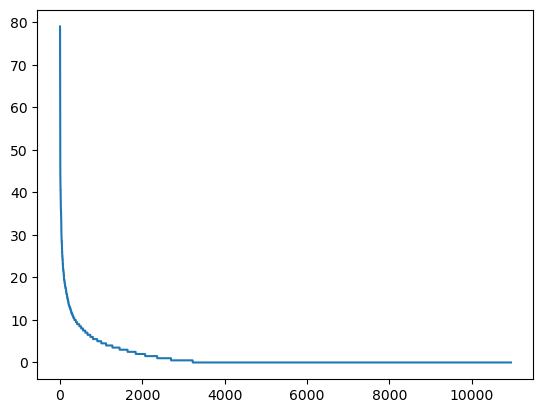

In [117]:
plt.plot(sorted_df.index, sorted_df["MaxRain1hour"])

In [119]:
sorted_df["MaxRain1hour"].mean()

1.4007121336620103

In [127]:
sorted_df["MaxRain1hour"].median()

0.0

... in this case, because we have a lot of days without rain, the median falls low and the mean maximum rainfall is not that high either. What if we could only consider days when it has been raining. In such case, we would need to define the days that are not 0 rainfall, as follows:

In [126]:
sorted_df[sorted_df["MaxRain1hour"]!= 0]["MaxRain1hour"].median()

3.0

In [128]:
sorted_df[sorted_df["MaxRain1hour"]!= 0]["MaxRain1hour"].mean()

4.7601613403661185

We can also use a convenient function .describe() in order to extract basic statistics about the table, and in the present case, we are doing it for all non zeros values.

In [131]:
sorted_df[sorted_df !=0].describe()

,MaxRain1hour,1時間降水量の最大(mm).1,1時間降水量の最大(mm).2,1時間降水量の最大(mm).3
count,3223.000000,5082.0,10957.000000,10957.0
mean,4.760161,1.0,7.991604,1.0
std,6.243025,0.0,0.191844,0.0
min,0.500000,1.0,1.000000,1.0
25%,1.000000,1.0,8.000000,1.0
50%,3.000000,1.0,8.000000,1.0
75%,5.500000,1.0,8.000000,1.0
max,79.000000,1.0,8.000000,1.0


Now that we have some statistical data, we can then repeat the work that we did above and instead of choosing the top 10, we can also choose the data in (let say) the top 75%:

In [139]:
Top75 = df[df['MaxRain1hour'] > 5.5]

In [140]:
Top75.head()

,MaxRain1hour,1時間降水量の最大(mm).1,1時間降水量の最大(mm).2,1時間降水量の最大(mm).3
Date,,,,
1993-06-02,10.0,0.0,8,1
1993-06-19,8.0,0.0,8,1
1993-06-23,7.5,0.0,8,1
1993-06-29,8.5,0.0,8,1
1993-06-30,6.5,0.0,8,1


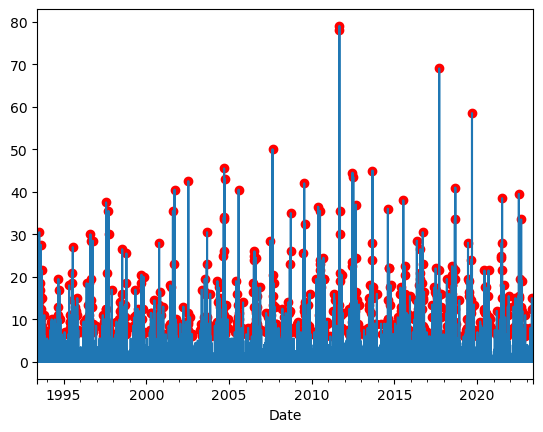

In [141]:
df["MaxRain1hour"].plot()
plt.scatter(Top75.index, Top75["MaxRain1hour"], color="red")
plt.show()